# 经典卷积网络


*在统计卷积神经网络层数时，一般只统计卷积计算层和全连接计算层*


>CBAPD

##### LeNet(1998)

通过共享卷积核减少了网络参数

##### AlexNet(2012) 

诞生于2012，当年ImageNet竞赛的冠军。使用relu激活函数提升了计算速度，Dropout缓解了过拟合

##### VGGNet(2014) 

当年ImageNet竞赛的亚军，使用小尺寸卷积核，在减少参数的同时，提高了识别准确率，结构规整适合网络加速

##### InceptionNet(2014) 

当年ImageNet冠军，InceptionNet引入了`Inception结构块`，无论是GoogLeNet，也就是Inception v1，还是InceptionNet的后续版本v2、v3、v4，都是基于此。

+ 在同一层网络内使用不同尺寸的卷积核，提升了模型感知力。
+ 使用了批标准化，缓解了梯度消失。
+ 通过在同一层网络内使用不同尺寸的卷积核，提取不同尺寸的特征。
+ 通过 1 * 1的卷积核作用到输入特征图的每个像素点。
+ 通过设定少于输入特征图深度的1 * 1卷积核个数，减少了输出特征图的深度，起到了降维的作用。减少了参数量和计算量。

##### ResNet(2015)

当年ImageNet冠军，ResNet提出了层间残差跳连，引入了前方信息，缓解梯度消失，是神经网络层数增加成为可能

+ Inception块中的 “+”是沿着深度方向叠加
+ ResNet块中的“+”是特征图对应元素值相加

### LeNet

    class LeNet5(Model):
        def __init__(self):
            super(LeNet,self).__init__()
            # 1
            self.c1 = Conv2D(filters=6,kernel_size=(5,5),activation="sigmodi)
            self.p1 = MaxPool2D(pool_size=(2,2),strides=2)
            # 2
            self.c2 = Conv2D(filters=16,kernel_size=(5,5),activation="sigmoid")
            self.p2 = MaxPool2D(pool_size=(2,2),strides=2)
            
            self.flatten = Flatten()
            # 3
            self.f1 = Dense(120,activation="sigmoid)
            # 4
            self.f2 = Dense(84,activation="sigmoid")
            # 5
            self.f3 = Dense(10,activation="softmax")
        def call(self):
            ....
            return y

### AlexNet

    class AlexNet8(Model):
        def __init__(self):
            super(AlexNet,self).__init__()
            # 1
            self.c1 = Conv2D(filters=96,kernel_size=(3,3))
            self.b1 = BatchNormalization()
            self.a1 = Activation('relu')
            self.p1 = MaxPool2D(pool_size=(3,3),strides=2)
            # 2
            self.c2 = Conv2D(filters=256,kernel_size=(3,3))
            self.b2 = BatchNormalization()
            self.a2 = Activation('relu')
            self.p2 = MaxPool2D(pool_size=(3,3),strides=2)
            # 3
            self.c3 = Conv2D(filters=284,kernel_size=(3,3),
                        padding='same',activation="relu")
            # 4
            self.c4 = Conv2D(filters=384,kernel_size=(3,3),
                        padding='same',activation="relu")
            # 5
            self.c5 = Conv2D(filters=256,kernel_size=(3,3),
                         padding='same',activation="relu")
            self.p3 = MaxPool2D(pool_size=(3,3),strides=2)
            
            self.flatten = Flatten()
            # 6
            self.f1 = Dense(2048,activation="relu")
            self.d1 = Dropout(0.5)
            # 7
            self.f2 = Dense(2048,activation="relu")
            self.d2 = Dropout(0.5)
            # 8
            self.f3 = Dense(10,activation="softmax")
            
        def call(self,x):
            x = self.c1(x)
            ....
            return y



### VGG

    class VGG16(Model):
        def __init__(self):
        super(VGG16,self).__init__()
        # 1
        self.c1 = Conv2D(filters=64,kernel_size=(3,3),padding="same")
        self.b1 = BatchNormalization()
        self.a1 = Activation("relu")
        # 2
        self.c2 = Conv2D(filters=64,kernel_size=(3,3),padding="same")
        self.b2 = BatchNormalization()
        self.a2 = Activation("relu")
        self.p1 = MaxPool2D(pool_size=(2,2),strides=2,padding="same")
        self.dropout(0.2)
        # 3
        self.c3 = Conv2D(filters=128,kernel_size=(3,3),padding="same")
        self.b3 = BatchNormalization()
        self.a3 = Activation("relu")
        # 4
        self.c4 = Conv2D(filters=128,kernel_size=(3,3),padding="same")
        self.b4 = BatchNormalization()
        self.a4 = Activation('relu') 
        self.p2 = MaxPool2D(pool_size=(2, 2), strides=2, padding='same')
        self.d2 = Dropout(0.2)
        # 5
        self.c5 = Conv2D(filters=256, kernel_size=(3, 3), padding='same')
        self.b5 = BatchNormalization()  
        self.a5 = Activation('relu') 
        # 6
        self.c6 = Conv2D(filters=256, kernel_size=(3, 3), padding='same')
        self.b6 = BatchNormalization() 
        self.a6 = Activation('relu')  
        # 7
        self.c7 = Conv2D(filters=256, kernel_size=(3, 3), padding='same')
        self.b7 = BatchNormalization()
        self.a7 = Activation('relu')
        self.p3 = MaxPool2D(pool_size=(2, 2), strides=2, padding='same')
        self.d3 = Dropout(0.2)
        # 8
        self.c8 = Conv2D(filters=512, kernel_size=(3, 3), padding='same')
        self.b8 = BatchNormalization() 
        self.a8 = Activation('relu')  
        # 9
        self.c9 = Conv2D(filters=512, kernel_size=(3, 3), padding='same')
        self.b9 = BatchNormalization()  
        self.a9 = Activation('relu')  
        # 10
        self.c10 = Conv2D(filters=512, kernel_size=(3, 3), padding='same')
        self.b10 = BatchNormalization()
        self.a10 = Activation('relu')
        self.p4 = MaxPool2D(pool_size=(2, 2), strides=2, padding='same')
        self.d4 = Dropout(0.2)
        # 11
        self.c11 = Conv2D(filters=512, kernel_size=(3, 3), padding='same')
        self.b11 = BatchNormalization() 
        self.a11 = Activation('relu')  
        # 12
        self.c12 = Conv2D(filters=512, kernel_size=(3, 3), padding='same')
        self.b12 = BatchNormalization() 
        self.a12 = Activation('relu')  
        # 13
        self.c13 = Conv2D(filters=512, kernel_size=(3, 3), padding='same')
        self.b13 = BatchNormalization()
        self.a13 = Activation('relu')
        self.p5 = MaxPool2D(pool_size=(2, 2), strides=2, padding='same')
        self.d5 = Dropout(0.2)
        # 14
        self.flatten = Flatten()
        self.f1 = Dense(512, activation='relu')
        self.d6 = Dropout(0.2)
        # 15
        self.f2 = Dense(512, activation='relu')
        self.d7 = Dropout(0.2)
        # 16
        self.f3 = Dense(10, activation='softmax')
    def call(self,x):
        ...
        return y
        
        

### InceptionNet
    # Inception结构块（CBN）
    class ConvBNRelu(Model):
        def __init__(self)__:
        super(ConvBNRelu,self).__init__()
        self.model = tf.keras.models.Sequential([
            Conv2D(ch,kernelsz=3,strides=1,padding='same'),
            BatchNormalization(),
            Activation('relu')
        ])
        def call(self,x):
            x = self.model(x)
            return x
            
    class InceptionBlk(Model):
        def __init__(self):
            super(InceptionBlk,self).__init__()
            # 第一个分支
            self.c1 = ConvBNRelu(ch,kernelsz=1,strides=strides)
            # 第二个分支
            self.c2_1 = ConvBNRelu(ch,kernelsz=1,strides=strides)
            self.c2_2 = ConvBNRelu(ch,kernelsz=3,strides=1)
            # 第三个分支
            self.c3_1 = ConvBNRelu(ch,kernelsz=1,strides=strides)
            self.c3_2 = ConvBNRelu(ch,kernelsz=5,strides=1)
            # 第四个分支
            self.p4_1 = MaxPool2D(3,strides=1,padding='same')
            self.c4_2 = ConvBNRelu(ch,kernelsz=1,strides=strides)
        def call(self,x):
            ...
            # 【四个分支的输出，堆叠在一起，axis=3指定堆叠的维度沿着深度方向】
            x = tf.concat([,,,],axis=3)
            return x
            
    class Inception10(Model):
        # 默认输出深度是16
        def __init__(self,num_blocks,num_classes,init_ch=16,**kwargs):#init_ch是卷积核数目
            super(Inception10,self).__init__(**kwargs)
            self.in_channels = init_ch
            self.out_channels = init_ch
            self.num_blocks = num_blocks
            self.init_ch = init_ch
            
            self.c1 = ConvBNRelu(init_ch)
            # 随后是4个Inception结构块顺序相连
            # 每两个Inception结构块构成一个block
            # block中的第一个Inception，卷积步长2，第二个1
            self.blocks = tf.keras.models.Sequential()
            for block_id in range(num_blocks)：
                for layer_id in range(2):
                    if layer_id == 0:
                        # strides=2使得输出特征图尺寸减半，因此把输出特征图深度加深
                        block = InceptionBlk(self.out_channels,strides=2)
                    else:
                        block = InceptionBlk(self.out_channels,strides=1)
                    self.block.add(block)
                # 以尽可能保持特征抽取中信息的承载量保持一致
                self.out_channels *= 2
            self.p1 = GlobalAveragePooling2D()
            self.f1 = Dense(num_classes,activation="softmax")
        def call(self,x):
            x = self.c1(x)
            x = self.blocks(x)
            x = self.p1(x)
            y = self.f1(x)
        return y
    model = Inception(num_blocks=2,num_classes=10)

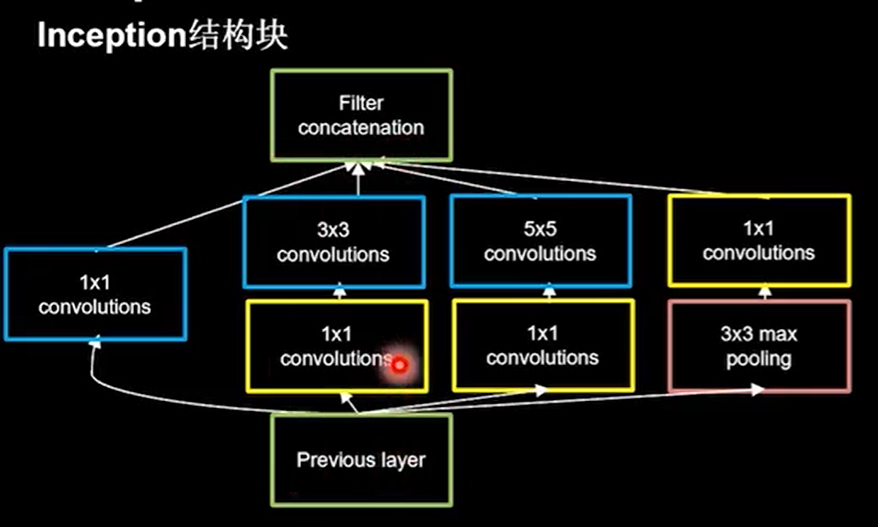